In [1]:
import numpy as np

X, y = np.load("data/Nasdaq100_stocks.npy"), np.load("data/Nasdaq100_index.npy")

In [2]:
X.shape, y.shape

((1510, 98), (1510,))

In [3]:
X_min = np.min(X, axis = 0)
X_max = np.max(X, axis = 0)
X = (X - X_min)/(X_max - X_min)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Model

In [5]:
from keras import Model, Input
from keras.layers import Dense
from keras import activations, losses, metrics
from keras.optimizers import Adam

In [6]:
n_feature = X.shape[1]

# Encodeur
x1 = Input(shape = (n_feature, ))
x2 = Dense(int(n_feature/2), activation = activations.relu)(x1)
x3 = Dense(int(n_feature/4), activation = activations.relu)(x2)
encodeur = Model(inputs = x1, outputs = x3)

# Decodeur
x4 = Input(shape = (int(n_feature/4), ))
x5 = Dense(int(n_feature/2), activation = activations.relu)(x4)
x6 = Dense(n_feature, activation = activations.sigmoid)(x5)
decodeur = Model(inputs = x4, outputs = x6)

# Autoencodeur
autoencodeur = Model(inputs = x1, outputs = decodeur(x3))

In [7]:
autoencodeur.compile(optimizer=Adam(learning_rate=0.001), loss=losses.mean_squared_error)
history = autoencodeur.fit(x=X_train, y=X_train, batch_size=64, epochs=100, validation_split = 0.2, verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0748 - val_loss: 0.0709
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0636 - val_loss: 0.0532
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0415 - val_loss: 0.0296
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - val_loss: 0.0198
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - val_loss: 0.0152
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0142 - val_loss: 0.0122
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 - val_loss: 0.0103
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - val_loss: 0.0081
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - val_loss: 0.0073
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

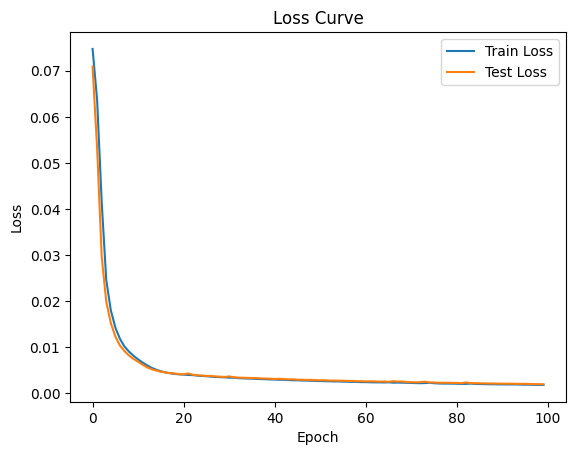

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(len(history.history["loss"])), history.history["loss"], label="Train Loss")
plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"], label="Test Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()